In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#propability of type 1 error
alpha = 0.05
#probability of type 2 error
beta = 0.2
#test power
power = (1-beta)
#number of tests = 1000
number_of_tests = 1_000
false_null_ratio = 0.1

расчет реального количества гипотез каждого типа

In [10]:
# расчет реального количества гипотез каждого типа
false_null_count = int(number_of_tests*false_null_ratio)
true_null_count = number_of_tests - false_null_count

In [11]:
false_null_count

100

In [12]:
true_null_count

900

In [16]:
# Симуляция решений для ВЕРНЫХ нулевых гипотез
# С вероятностью α мы ошибочно отвергаем верную H₀
#0 - не отвергаем, 1 - отвергаем
true_null_decisions = np.random.choice([0, 1], size=true_null_count, 
                                      p=[1-alpha, alpha])

In [17]:
np.mean(true_null_decisions)

np.float64(0.04888888888888889)

In [19]:
# 0 - не отвергаем, 1 - отвергаем
# Симуляция решений для НЕВЕРНЫХ нулевых гипотез  
# С вероятностью power мы правильно отвергаем ложную H₀
false_null_decisions = np.random.choice([0, 1], size=false_null_count,
                                       p=[beta, power])

In [20]:
false_null_decisions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
# Ошибочно отвергнутые верные H₀ (I род)
false_positives = np.sum(true_null_decisions) 
# Корректно не отвергнутые верные H₀
true_negatives = true_null_count - false_positives 
# Корректно отвергнутые ложные H₀
true_positives = np.sum(false_null_decisions)
#false_negatives = n_false_null - true_positives
false_negatives = false_null_count - true_positives

In [24]:
print("=== РЕЗУЛЬТАТЫ СИМУЛЯЦИИ ===")
print(f"Ошибочно отвергнуто (False Positives): {false_positives}")
print(f"Корректно отвергнуто (True Positives): {true_positives}") 
print(f"Ошибочно не отвергнуто (False Negatives): {false_negatives}")
print(f"Корректно не отвергнуто (True Negatives): {true_negatives}")
print()

=== РЕЗУЛЬТАТЫ СИМУЛЯЦИИ ===
Ошибочно отвергнуто (False Positives): 44
Корректно отвергнуто (True Positives): 79
Ошибочно не отвергнуто (False Negatives): 21
Корректно не отвергнуто (True Negatives): 856



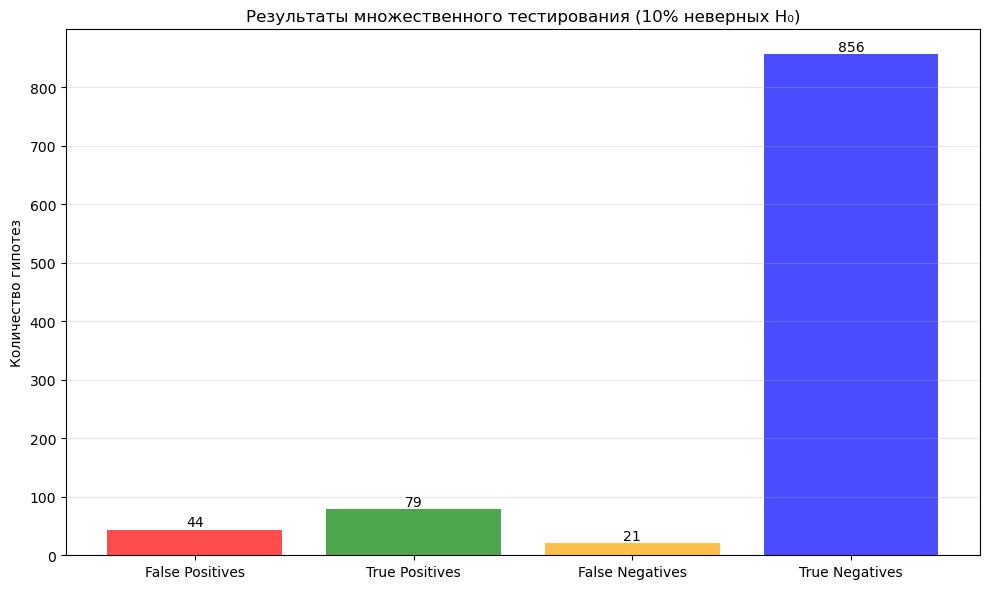

In [26]:
# Визуализация
categories = ['False Positives', 'True Positives', 'False Negatives', 'True Negatives']
values = [false_positives, true_positives, false_negatives, true_negatives]
colors = ['red', 'green', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.7)
plt.title('Результаты множественного тестирования (10% неверных H₀)')
plt.ylabel('Количество гипотез')

# Добавляем значения на столбцы
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
claimed_discoveries = 79+44
claimed_discoveries

123

In [30]:
proportion_of_wrong_discoveries = 44/claimed_discoveries
proportion_of_wrong_discoveries

0.35772357723577236